In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os
if os.name =='nt' :
    plt.rc("font", family="Malgun Gothic")

plt.rc("axes", unicode_minus=False)

In [3]:
%config lnlineBackend.figure_format = "retina"

In [6]:
df=pd.read_csv("data/수원도시공사_실내공기질 측정 정보_20200610.csv", encoding="cp949")
df.shape

(21, 10)

In [7]:
df.head

<bound method NDFrame.head of            주차장명                     주소     규모(㎡)  미세먼지(㎍/㎡)  이산화탄소(ppm)  \
0       권선지하공영1    경기도 수원시 권선구 권선동 980   2073.96       34.6         454   
1       권선지하공영2    경기도 수원시 권선구 권선동 980   2073.96       31.3         499   
2         영통공영1  경기도 수원시 영통구 영통동 995-3  10809.84       60.2         545   
3         영통공영2  경기도 수원시 영통구 영통동 995-3  10809.84       53.2         501   
4         영통공영3  경기도 수원시 영통구 영통동 995-3  10809.84       49.9         450   
5         매봉공영1   경기도 수원시 영통구 매탄동 1210   5302.71       46.9         458   
6         매봉공영2   경기도 수원시 영통구 매탄동 1210   5302.71       34.1         462   
7        영화동공영1  경기도 수원시 장안구 영화동 230-3      3520       43.3         450   
8        영화동공영2  경기도 수원시 장안구 영화동 230-3      3520       39.7         496   
9         인계공영1    경기도 수원시 팔달구 인계동 944   2620.17       64.4         580   
10        인계공영2    경기도 수원시 팔달구 인계동 944   2620.17       61.8         492   
11        교동공영1      경기도 수원시 팔달구 교동 98   9165.68       52.0         55

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
주차장명           21 non-null object
주소             21 non-null object
규모(㎡)          21 non-null object
미세먼지(㎍/㎡)      21 non-null float64
이산화탄소(ppm)     21 non-null int64
포름알데히드(㎍/㎡)    21 non-null float64
일산화탄소(ppm)     21 non-null float64
오존(ppm)        0 non-null float64
측정결과           21 non-null object
데이터기준날짜        21 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 1.8+ KB


In [9]:
df.columns

Index(['주차장명', '주소', '규모(㎡)', '미세먼지(㎍/㎡)', '이산화탄소(ppm)', '포름알데히드(㎍/㎡)',
       '일산화탄소(ppm)', '오존(ppm)', '측정결과', '데이터기준날짜 '],
      dtype='object')

In [11]:
df.isnull().sum()

주차장명            0
주소              0
규모(㎡)           0
미세먼지(㎍/㎡)       0
이산화탄소(ppm)      0
포름알데히드(㎍/㎡)     0
일산화탄소(ppm)      0
오존(ppm)        21
측정결과            0
데이터기준날짜         0
dtype: int64

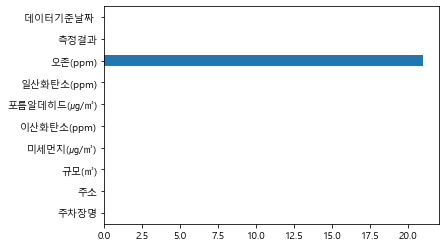

In [13]:
df.isnull().sum().plot.barh()

In [14]:
df["오존(ppm)"]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
Name: 오존(ppm), dtype: float64

In [15]:
df = df.drop("오존(ppm)", axis=1)

In [16]:
df.shape

(21, 9)

In [20]:
df["미세먼지(㎍/㎡)"].value_counts()

49.9    2
52.1    1
48.3    1
64.5    1
51.5    1
45.3    1
34.1    1
64.4    1
34.6    1
39.7    1
46.9    1
53.2    1
47.6    1
48.9    1
43.3    1
60.2    1
31.3    1
55.9    1
61.8    1
52.0    1
Name: 미세먼지(㎍/㎡), dtype: int64

In [22]:
df.groupby(["규모(㎡)"])["미세먼지(㎍/㎡)"].count()

규모(㎡)
10809.84    3
2,571.83    2
2073.96     2
2620.17     2
3,393       2
3520        2
3550        2
4105.6      2
5302.71     2
9165.68     2
Name: 미세먼지(㎍/㎡), dtype: int64

In [24]:
df.pivot_table(index="규모(㎡)", values="이산화탄소(ppm)", aggfunc=["mean", "median"])

,mean,median
,이산화탄소(ppm),이산화탄소(ppm)
규모(㎡),,
10809.84,498.666667,501.0
"2,571.83",428.000000,428.0
2073.96,476.500000,476.5
2620.17,536.000000,536.0
"3,393",572.500000,572.5
3520,473.000000,473.0
3550,503.500000,503.5
4105.6,491.500000,491.5


In [26]:
df.pivot_table(index="규모(㎡)", values="이산화탄소(ppm)", aggfunc="describe")

,25%,50%,75%,count,max,mean,min,std
규모(㎡),,,,,,,,
10809.84,475.50,501.0,523.00,3.0,545.0,498.666667,450.0,47.542963
"2,571.83",421.50,428.0,434.50,2.0,441.0,428.000000,415.0,18.384776
2073.96,465.25,476.5,487.75,2.0,499.0,476.500000,454.0,31.819805
2620.17,514.00,536.0,558.00,2.0,580.0,536.000000,492.0,62.225397
"3,393",566.25,572.5,578.75,2.0,585.0,572.500000,560.0,17.677670
3520,461.50,473.0,484.50,2.0,496.0,473.000000,450.0,32.526912
3550,498.75,503.5,508.25,2.0,513.0,503.500000,494.0,13.435029
4105.6,486.75,491.5,496.25,2.0,501.0,491.500000,482.0,13.435029
5302.71,459.00,460.0,461.00,2.0,462.0,460.000000,458.0,2.828427


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002356C256108>,
      dtype=object)

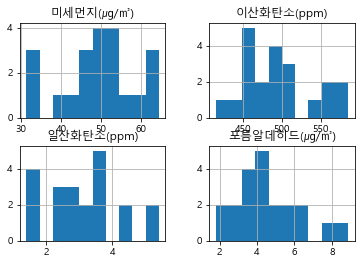

In [28]:
df.hist()

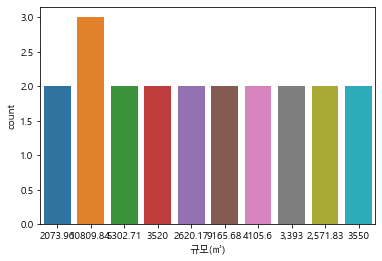

In [29]:
sns.countplot(data=df, x="규모(㎡)")

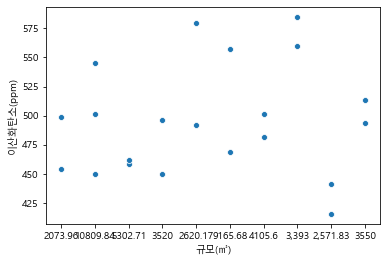

In [30]:
sns.scatterplot(data=df, x="규모(㎡)", y="이산화탄소(ppm)" )

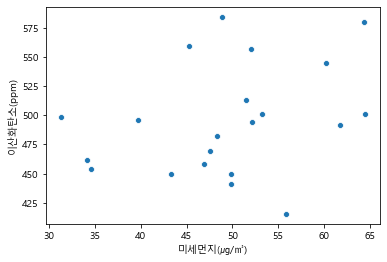

In [31]:
sns.scatterplot(data=df, x="미세먼지(㎍/㎡)", y="이산화탄소(ppm)" )

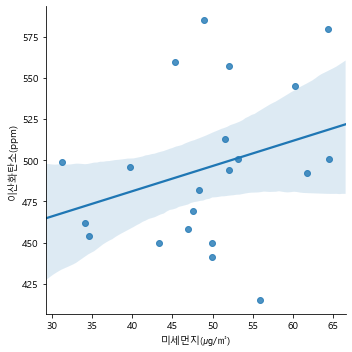

In [32]:
sns.lmplot(data=df, x="미세먼지(㎍/㎡)", y="이산화탄소(ppm)")

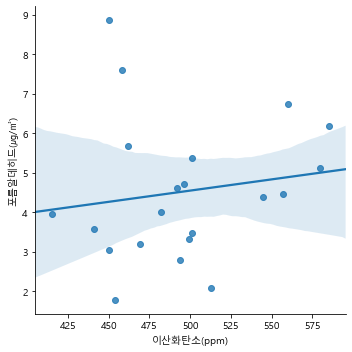

In [33]:
sns.lmplot(data=df, x="이산화탄소(ppm)", y="포름알데히드(㎍/㎡)")

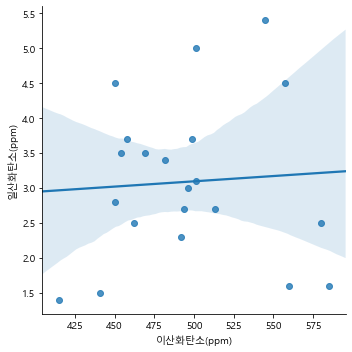

In [34]:
sns.lmplot(data=df, x="이산화탄소(ppm)", y="일산화탄소(ppm)")

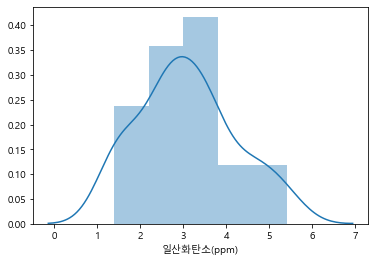

In [35]:
sns.distplot(df["일산화탄소(ppm)"])

In [36]:
df_corr = df.corr()
df_corr

,미세먼지(㎍/㎡),이산화탄소(ppm),포름알데히드(㎍/㎡),일산화탄소(ppm)
미세먼지(㎍/㎡),1.000000,0.302429,0.012051,0.015338
이산화탄소(ppm),0.302429,1.000000,0.151371,0.063017
포름알데히드(㎍/㎡),0.012051,0.151371,1.000000,-0.228636
일산화탄소(ppm),0.015338,0.063017,-0.228636,1.000000


In [37]:
df_corr["일산화탄소(ppm)"].sort_values()

포름알데히드(㎍/㎡)   -0.228636
미세먼지(㎍/㎡)      0.015338
이산화탄소(ppm)     0.063017
일산화탄소(ppm)     1.000000
Name: 일산화탄소(ppm), dtype: float64

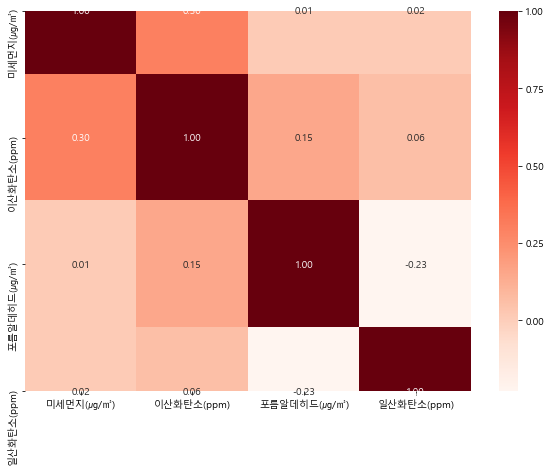

In [44]:
plt.figure(figsize=(10,7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Reds")

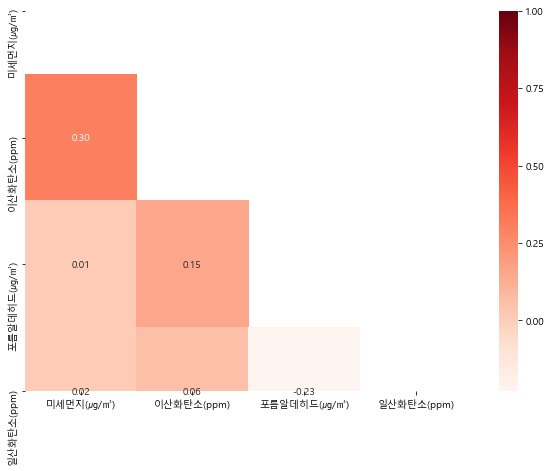

In [46]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
mask

plt.figure(figsize=(10,7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Reds", mask=mask)